In [1]:
import os

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time



# 🎯 Load your YOLOv8 model
model = YOLO(r"F:\Projects_New\Leaves detection\best.pt")  # Change path if model is in another folder



image 1/1 F:\PIL LAB\PlantLeafDatasetl\train\shadow\IMG_4514.JPG: 640x480 4 leafs, 2537.8ms
Speed: 11.0ms preprocess, 2537.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


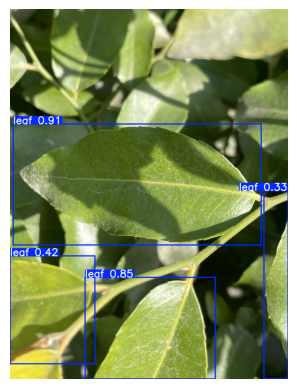

In [9]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


# Path to a single image
img_path = r"F:\PIL LAB\PlantLeafDatasetl\train\shadow\IMG_4514.JPG"         
# img_path=  r"F:\PIL LAB\PlantLeafDatasetl\train\shadow\IMG_4364.JPG"

# Run detection
results = model(img_path)

# Show results
for r in results:
    im_array = r.plot()
    plt.imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [ ]:
"F:\PIL LAB\PlantLeafDatasetl\train\shadow\IMG_4514.JPG"

In [2]:
stop_flag = False

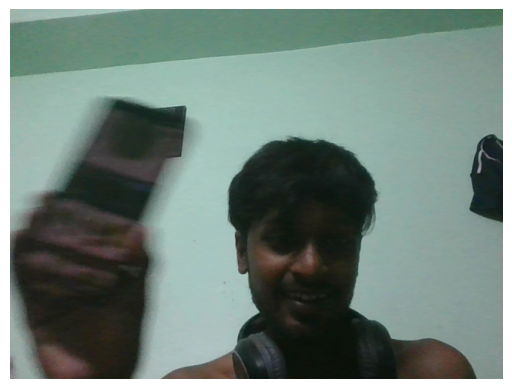


0: 480x640 (no detections), 2585.8ms
Speed: 16.0ms preprocess, 2585.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
# 🎥 Real-time detection inside Jupyter Notebook (inline display) with stop command

cap = cv2.VideoCapture(0)  # 0 for default webcam

# Optional: set resolution
cap.set(3, 640)
cap.set(4, 480)

while not stop_flag:  # <-- now it checks the stop_flag
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO inference
    results = model(frame, conf=0.5)

    # Get annotated frame
    annotated_frame = results[0].plot()

    # Convert BGR → RGB for matplotlib
    annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Display in notebook
    clear_output(wait=True)
    plt.imshow(annotated_frame)
    plt.axis("off")
    display(plt.gcf())

    # Delay for smooth display
    time.sleep(0.03)  # ~30 FPS

cap.release()


In [6]:
# import os
# import shutil

# def copy_valid_images(src_folder, dst_folder):
#     valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".webp", ".jfif"}
#     os.makedirs(dst_folder, exist_ok=True)
#     count = 0

#     for root, _, files in os.walk(src_folder):
#         for filename in files:
#             ext = os.path.splitext(filename)[1].lower()
#             if ext in valid_extensions:
#                 src_path = os.path.join(root, filename)

#                 # Check if file exists before copying
#                 if not os.path.exists(src_path):
#                     print(f"❌ File missing: {src_path}")
#                     continue

#                 dst_path = os.path.join(dst_folder, filename)
#                 if os.path.exists(dst_path):
#                     name, ext2 = os.path.splitext(filename)
#                     dst_path = os.path.join(dst_folder, f"{name}_copy{ext2}")

#                 try:
#                     shutil.copy2(src_path, dst_path)
#                     print(f"✅ Copied: {src_path}")
#                     count += 1
#                 except Exception as e:
#                     print(f"⚠️ Failed to copy {src_path} → {e}")

#     print(f"\n🎯 Done! {count} valid images copied to {dst_folder}")

# # Example usage
# source_folder = r"F:\PIL LAB\Focus_score\PlantDoc-Object-Detection-Dataset-master\TRAIN"
# destination_folder = r"F:\Projects_New\Leaves detection\train"

# copy_valid_images(source_folder, destination_folder)
